In [10]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

In [6]:
import os
%pwd

'/mnt/c/Users/sv/source/Enhancement/Image-Enchancer/Experiments'

In [7]:
os.chdir("..")

In [2]:
def calculate_percentiles(hist, percentiles=[2, 98]):
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]
    low_thresh = np.searchsorted(cdf_normalized, percentiles[0] / 100.0)
    high_thresh = np.searchsorted(cdf_normalized, percentiles[1] / 100.0)
    return low_thresh, high_thresh

In [3]:
def adjust_brightness_contrast(image, low_thresh, high_thresh):
    # Stretch the image intensity values to the full range [0, 255] based on low_thresh and high_thresh
    image_adjusted = np.clip((image - low_thresh) * (255.0 / (high_thresh - low_thresh)), 0, 255).astype(np.uint8)
    return image_adjusted

In [29]:
def process_image(image_path):
    # Load the image and convert it to RGB format
    image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    # Calculate the histogram and the low/high threshold values based on percentiles
    hist = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
    low_thresh, high_thresh = calculate_percentiles(hist)
    
    # Adjust brightness and contrast with clipping to prevent artifacts
    adjusted_img = adjust_brightness_contrast(image_rgb, low_thresh, high_thresh)
    
    # Convert to PIL Image for further processing
    adjusted_img_pil = Image.fromarray(adjusted_img)
    
    # Enhance Brightness and Contrast carefully
    brightness_enhancer = ImageEnhance.Brightness(adjusted_img_pil)
    adjusted_img_pil = brightness_enhancer.enhance(1.4) 

    contrast_enhancer = ImageEnhance.Contrast(adjusted_img_pil)
    adjusted_img_pil = contrast_enhancer.enhance(0.5)  
    
    return adjusted_img_pil

In [22]:
os.makedirs("OutputImages")

In [23]:
os.listdir()

['.git',
 '.gitignore',
 'app',
 'Dataset',
 'Dataset.7z',
 'Experiments',
 'Images',
 'japan_house.jpg',
 'manbehindbag.jpg',
 'original_image.jpg',
 'OutputImages',
 'path_to_save_adjusted_image.jpg',
 'poetry.lock',
 'pyproject.toml',
 'README.md']

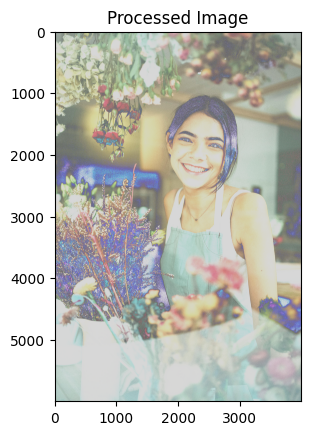

In [30]:
image_path = "./Dataset/pexels-amina-filkins-5409772.jpg"
processed_image = process_image(image_path)

# Display the processed image

plt.imshow(processed_image)
plt.title("Processed Image")
plt.show()

processed_image.save('./OutputImages/girl_image.jpg')